# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Import in the csv files:
df_sat_2017 = pd.read_csv('../data/sat_2017.csv')
df_act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Display imported files to ensure imported correctly:
display(df_sat_2017.head(10))
display(df_act_2017.head(10))


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 
The SAT 2017 data set contains the SAT participation rate and SAT scores(with subscores for 'Evidence-Based Reading and Writing', 'Math' and the total score) for each individual state.

The ACT 2017 data set contains the ACT participation rate and ACT scores(with subscores for 'Participation','Math','Reading','Science' and the Composite score) for each individual state.

#### 4a. Does the data look complete? 

Answer: Yes, on observation of the first 10 rows

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: SAT has minimum scores of 200 and maximum of 800 for each sub-test, and 400-1600 overall

The ACT has scores of 1-36 for each subtest and the same for the composite as it is the average of the subtests.

In [4]:
display(df_sat_2017.dtypes)
display(df_act_2017.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [5]:
#Checking for errors
display(df_sat_2017[~df_sat_2017['Math'].between(200,800)])
display(df_sat_2017[~df_sat_2017['Evidence-Based Reading and Writing'].between(200,800)])
display(df_sat_2017[~df_sat_2017['Total'].between(400,1600)])
display(df_act_2017[~df_act_2017['Math'].between(1,36)])
display(df_act_2017[~df_act_2017['English'].between(1,36)])
display(df_act_2017[~df_act_2017['Reading'].between(1,36)])
display(df_act_2017[~df_act_2017['Science'].between(1,36)])


,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


,State,Participation,Evidence-Based Reading and Writing,Math,Total


,State,Participation,Evidence-Based Reading and Writing,Math,Total


,State,Participation,English,Math,Reading,Science,Composite


,State,Participation,English,Math,Reading,Science,Composite


,State,Participation,English,Math,Reading,Science,Composite


,State,Participation,English,Math,Reading,Science,Composite


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [6]:
#fixing error found
df_sat_2017.loc[20,'Math']=524


#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
#code
df_sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [8]:
df_act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The participation rates in both tests are objects, and the act composite score is an object as well. For the participation rates, this is likely because of the percentage sign in the entries, resulting in them being strings, but the composite score is likely an error somewhere.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
a=pd.Series(['f.o', 'fuz', np.nan])
a.str.replace('f.', 'ba', regex=False)
type(a)

pandas.core.series.Series

In [10]:
#code
numerify= lambda x:float(x.replace('%','')) if type(x) == str else x

df_sat_2017['Participation']=df_sat_2017['Participation'].map(numerify)
df_act_2017['Participation']=df_act_2017['Participation'].map(numerify)


In [11]:
display(df_sat_2017.dtypes)
display(df_act_2017.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [12]:
df_act_2017['Composite']

0      21.0
1      19.2
2      19.8
3      19.7
4      19.4
5      22.8
6      20.8
7      25.2
8      24.1
9      24.2
10     19.8
11     21.4
12     19.0
13     22.3
14     21.4
15     22.6
16     21.9
17     21.7
18     20.0
19     19.5
20     24.3
21     23.6
22     25.4
23     24.1
24     21.5
25     18.6
26     20.4
27     20.3
28     21.4
29     17.8
30     25.5
31     23.9
32     19.7
33     24.2
34     19.1
35     20.3
36     22.0
37     19.4
38     21.8
39     23.7
40     24.0
41     18.7
42     21.8
43     19.8
44     20.7
45     20.3
46     23.6
47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
#code
df_act_2017.loc[51,'Composite']=20.2
df_act_2017.loc[21,'Science']=23.2

df_act_2017


,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8
6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2


- Finish your data modifications by making sure the columns are now typed appropriately.

In [14]:
#code
df_act_2017['Composite']=df_act_2017['Composite'].map(numerify)

- Display the data types again to confirm they are correct.

In [111]:
df_sat_2017

,state,participation_sat_2017,evidence-based reading and writing_sat_2017,math_sat_2017,total_sat_2017
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055
5,Colorado,11.0,606,595,1201
6,Connecticut,100.0,530,512,1041
7,Delaware,100.0,503,492,996
8,District of Columbia,100.0,482,468,950
9,Florida,83.0,520,497,1017


In [16]:
#Code:
df_act_2017.dtypes

#checking for numbers out of the permitted scope
display(df_act_2017[~df_act_2017['Composite'].between(1,36)])
display(df_act_2017[~df_act_2017['Participation'].between(0,100)])
display(df_sat_2017[~df_sat_2017['Participation'].between(0,100)])

,State,Participation,English,Math,Reading,Science,Composite


,State,Participation,English,Math,Reading,Science,Composite


,State,Participation,Evidence-Based Reading and Writing,Math,Total


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [17]:
#changes columns to lower-case and names them in preparation for later
satize=lambda x: x.lower() if x=='State' else x.lower() +'_sat_2017'
actize=lambda x: x.lower() if x== 'State' else x.lower() +'_act_2017'

df_sat_2017.columns=df_sat_2017.columns.map(satize)
df_act_2017.columns=df_act_2017.columns.map(actize)



In [18]:
df_sat_2017.dtypes


state                                           object
participation_sat_2017                         float64
evidence-based reading and writing_sat_2017      int64
math_sat_2017                                    int64
total_sat_2017                                   int64
dtype: object

In [19]:
df_act_2017.dtypes

state                      object
participation_act_2017    float64
english_act_2017          float64
math_act_2017             float64
reading_act_2017          float64
science_act_2017          float64
composite_act_2017        float64
dtype: object

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example|
|state|object|ACT|State list|
|participation_act_2017|float|ACT|The percentage the state who sat for the ACT|
|english_act_2017|float|ACT|Average English ACT scores of the partipants in the state|
|math_act_2017|float|ACT|Average math ACT scores of the partipants in the state|
|reading_act_2017|float|ACT|Average reading ACT scores of the partipants in the state|
|science_act_2017|float|ACT|Average science ACT scores of the partipants in the state|
|composite_act_2017|float|ACT|Average composite ACT scores of the partipants in the state|
|participation_sat_2017|float|ACT|The percentage the state who sat for the ACT|
|evidence-based reading and writing_sat_2017|int|ACT|Average English ACT scores of the partipants in the state|
|math_sat_2017|int|ACT|Average math ACT scores of the partipants in the state|
|total_sat_2017|int|ACT|Average reading ACT scores of the partipants in the state|
|participation_act_2018|float|ACT|The percentage the state who sat for the ACT|
|english_act_2018|float|ACT|Average English ACT scores of the partipants in the state|
|math_act_2018|float|ACT|Average math ACT scores of the partipants in the state|
|reading_act_2018|float|ACT|Average reading ACT scores of the partipants in the state|
|science_act_2018|float|ACT|Average science ACT scores of the partipants in the state|
|composite_act_2018|float|ACT|Average composite ACT scores of the partipants in the state|
|participation_sat_2018|float|ACT|The percentage the state who sat for the ACT|
|evidence-based reading and writing_sat_2018|int|ACT|Average English ACT scores of the partipants in the state|
|math_sat_2018|int|ACT|Average math ACT scores of the partipants in the state|
|total_sat_2018|int|ACT|Average reading ACT scores of the partipants in the state|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [20]:
#dropping the extra row which is the national score
mask=df_act_2017['state']!='National'
df_act_2017=df_act_2017[mask]
df_act_2017

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8
6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2
10,Florida,73.0,19.0,19.4,21.0,19.4,19.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
#Merging, the join-type does not matter
combined_2017=df_act_2017.merge(df_sat_2017,on='state', how='left')


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [22]:
#code
#combined_2017.to_csv(path_or_buf='../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [23]:
#importing the data from the csv files
act_2018=pd.read_csv('../data/act_2018.csv')
sat_2018=pd.read_csv('../data/sat_2018.csv')

In [24]:
#taking a glance at the datasets
display(act_2018.info())
display(sat_2018.info())

#participation will have to be cleaned and type updated


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
state            53 non-null object
participation    53 non-null int64
english          53 non-null float64
math             53 non-null float64
reading          53 non-null float64
science          53 non-null float64
composite        53 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


None

In [25]:
#rename columns
satize=lambda x: x.lower() if x=='State' else x.lower() +'_sat_2018'
actize=lambda x: x.lower() if x== 'state' else x.lower() +'_act_2018'

sat_2018.columns=sat_2018.columns.map(satize)
act_2018.columns=act_2018.columns.map(actize)

In [26]:
#removing % and updating type
numerify= lambda x: None if x=='Not given' else float(x)
numerify2= lambda x:float(x.replace('%','')) if type(x) == str else x
sat_2018['participation_sat_2018']=sat_2018['participation_sat_2018'].map(numerify2)
act_2018['participation_act_2018']=act_2018['participation_act_2018'].map(numerify)


In [27]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
state                     53 non-null object
participation_act_2018    53 non-null float64
english_act_2018          53 non-null float64
math_act_2018             53 non-null float64
reading_act_2018          53 non-null float64
science_act_2018          53 non-null float64
composite_act_2018        53 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


In [28]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                                          51 non-null object
participation_sat_2018                         51 non-null float64
evidence-based reading and writing_sat_2018    51 non-null int64
math_sat_2018                                  51 non-null int64
total_sat_2018                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [29]:
#There are different number of entries again, and upon inspection, we have the national aggregate for the ACT which is not present in SAT, so we remove it
mask=act_2018['state']!='National'
act_2018=act_2018[mask]

display(act_2018.head())
display(sat_2018.head())

,state,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018
0,Alabama,100.0,18.9,18.3,19.6,19.0,19.1
1,Alaska,33.0,19.8,20.6,21.6,20.7,20.8
2,Arizona,66.0,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100.0,19.1,18.9,19.7,19.4,19.4
4,California,27.0,22.5,22.5,23.0,22.1,22.7


,state,participation_sat_2018,evidence-based reading and writing_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [30]:
#finding errors
display(sat_2018[~sat_2018['participation_sat_2018'].between(0,100)])
display(sat_2018[~sat_2018['math_sat_2018'].between(200,800)])
display(sat_2018[~sat_2018['evidence-based reading and writing_sat_2018'].between(200,800)])
display(act_2018[~act_2018['participation_act_2018'].between(0,100)])
display(act_2018[~act_2018['math_act_2018'].between(1,36)])
display(act_2018[~act_2018['english_act_2018'].between(1,36)])
display(act_2018[~act_2018['reading_act_2018'].between(1,36)])
display(act_2018[~act_2018['science_act_2018'].between(1,36)])
display(act_2018[~act_2018['composite_act_2018'].between(1,36)])

,state,participation_sat_2018,evidence-based reading and writing_sat_2018,math_sat_2018,total_sat_2018


,state,participation_sat_2018,evidence-based reading and writing_sat_2018,math_sat_2018,total_sat_2018


,state,participation_sat_2018,evidence-based reading and writing_sat_2018,math_sat_2018,total_sat_2018


,state,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018


,state,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018


,state,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018


,state,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018


,state,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018


,state,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [31]:
combined_2017=df_act_2017.merge(df_sat_2017,on='state', how='left')
combined_2018=act_2018.merge(sat_2018,on='state',how='left')
final=combined_2017.merge(combined_2018,on='state',how='left')
final.rename(columns=lambda x: x.replace('evidence-based reading and ',''),inplace=True)
final.to_csv(path_or_buf='../data/final.csv')

In [32]:

final['']

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,writing_sat_2017,math_sat_2017,...,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,writing_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100.0,18.9,18.3,19.6,19.0,19.1,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33.0,19.8,20.6,21.6,20.7,20.8,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66.0,18.2,19.4,19.5,19.2,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100.0,19.1,18.9,19.7,19.4,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27.0,22.5,22.5,23.0,22.1,22.7,60.0,540,536,1076
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,...,30.0,23.9,23.2,24.4,23.5,23.9,100.0,519,506,1025
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,...,26.0,26.0,24.8,26.1,24.9,25.6,100.0,535,519,1053
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,...,17.0,23.7,23.1,24.5,23.4,23.2,100.0,505,492,998
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,...,32.0,23.7,22.7,24.4,23.0,23.6,92.0,497,480,977
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,...,66.0,19.2,19.3,21.1,19.5,19.9,56.0,550,549,1099


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [33]:
#Code: 
final.describe()

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,writing_sat_2018,math_sat_2018,total_sat_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [34]:
#code
def stdev(data):
    l=len(data)
    mean=np.mean(data)
    return np.sqrt(np.sum([(x-mean)**2 for x in data])/l)
    
stdev(final['english_act_2017'])

2.3304876369363368

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [35]:
final.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,writing_sat_2017,math_sat_2017,...,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,writing_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100.0,18.9,18.3,19.6,19.0,19.1,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33.0,19.8,20.6,21.6,20.7,20.8,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66.0,18.2,19.4,19.5,19.2,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100.0,19.1,18.9,19.7,19.4,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27.0,22.5,22.5,23.0,22.1,22.7,60.0,540,536,1076


In [36]:
final.dtypes

state                      object
participation_act_2017    float64
english_act_2017          float64
math_act_2017             float64
reading_act_2017          float64
science_act_2017          float64
composite_act_2017        float64
participation_sat_2017    float64
writing_sat_2017            int64
math_sat_2017               int64
total_sat_2017              int64
participation_act_2018    float64
english_act_2018          float64
math_act_2018             float64
reading_act_2018          float64
science_act_2018          float64
composite_act_2018        float64
participation_sat_2018    float64
writing_sat_2018            int64
math_sat_2018               int64
total_sat_2018              int64
dtype: object

In [37]:
#Code:

sd={item:stdev(final.iloc[:,x]) for x,item in enumerate(final.columns) if item != 'state'}
sd2=final.std()
sd3={item:np.std(final.iloc[:,x]) for x,item in enumerate(final.columns) if item != 'state'}

In [38]:
sds=pd.DataFrame({'sd1':sd,'sd2':sd2,"sd3":sd3})
sds
final.shape

(51, 21)

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The manually calculated standard deviations are slightly lower than that found in the pandas.describe() function, but are the same as the numpy's std function.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [39]:
#2017 SAT participation and scores
stat='participation_sat_2017'
display(final.sort_values(stat,ascending=False)[['state',stat]].head(5))
display(final.sort_values(stat,ascending=True)[['state',stat]].head(5))

score='total_sat_2017'
display(final.sort_values(score,ascending=False)[['state',score]].head(5))
display(final.sort_values(score,ascending=True)[['state',score]].head(5))

,state,participation_sat_2017
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


,state,participation_sat_2017
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


,state,total_sat_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


,state,total_sat_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


4 states have 100% participation rate, indicating some sort of legislation or mandatory testing. I would expect that the list of highest participation will not change much.

Hypothesis 1: it looks like there may be an inverse relationship between score and participation rate. 

This could be because of unmotivated students being forced to take the test, bringing the average performance down, while in states where students choose to take the test, they are likely more prepared and do better.

In [40]:
#2018 SAT participation
stat='participation_sat_2018'
display(final.sort_values(stat,ascending=False)[['state',stat]].head(6))
display(final.sort_values(stat,ascending=True)[['state',stat]].head(5))

score='total_sat_2018'
display(final.sort_values(score,ascending=False)[['state',score]].head(5))
display(final.sort_values(score,ascending=True)[['state',score]].head(5))

,state,participation_sat_2018
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0
19,Maine,99.0


,state,participation_sat_2018
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0


,state,total_sat_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


,state,total_sat_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


The highest participation did change, with Colorado and Idaho entering and District of Columbia exiting.

North Dakota remained the same

There are multiple signs of the Hypothesis 1 holding, and will definitely bear investigation.

In [41]:
#2017 ACT participation
stat='participation_act_2017'
display(final.sort_values(stat,ascending=False)[['state',stat]].head(18))
display(final.sort_values(stat,ascending=True)[['state',stat]].head(5))

score='composite_act_2017'
display(final.sort_values(score,ascending=False)[['state',score]].head(5))
display(final.sort_values(score,ascending=True)[['state',score]].head(5))

,state,participation_act_2017
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


,state,participation_act_2017
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


,state,composite_act_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


,state,composite_act_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


Again, the trend of having multiple states with 100% participation shows up, indicating the possibility of mandatory testing or government policy.

Interestingly, North Dakota which has the lowest SAT participation has one of the highest ACT participations, and Maine which has one of the highest SAT participation has the lowest ACT participation.

Hypothesis 2: There is a negative correlation between the SAT and ACT participation

this would make sense as college applicants might want to save the effort of doing both equivalent tests

There are signs that Hypothesis 1 may apply to ACT as well

In [42]:
#2018 ACT participation
stat='participation_act_2018'
display(final.sort_values(stat,ascending=False)[['state',stat]].head(18))
display(final.sort_values(stat,ascending=True)[['state',stat]].head(5))

score='composite_act_2018'
display(final.sort_values(score,ascending=False)[['state',score]].head(5))
display(final.sort_values(score,ascending=True)[['state',score]].head(5))

,state,participation_act_2018
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
35,Ohio,100.0
33,North Carolina,100.0
28,Nevada,100.0


,state,participation_act_2018
19,Maine,7.0
39,Rhode Island,15.0
29,New Hampshire,16.0
7,Delaware,17.0
38,Pennsylvania,20.0


,state,composite_act_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


,state,composite_act_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


Hypothesis 1 and 2 are supported and will be investigated

In [43]:
#Do any states with 100% participation on a given test have a rate change year-to-year?

#2018 ACT participation
stat1='participation_act_2017'
stat2='participation_act_2018'
stat3='participation_sat_2017'
stat4='participation_sat_2018'
final[((final[stat1]==100)&(final[stat2]!=100))|
      ((final[stat1]!=100)&(final[stat2]==100))|
      ((final[stat3]==100)&(final[stat4]!=100))|
      ((final[stat3]!=100)&(final[stat4]==100))][['state',stat1,stat3,stat2,stat4]]


,state,participation_act_2017,participation_sat_2017,participation_act_2018,participation_sat_2018
5,Colorado,100.0,11.0,30.0,100.0
8,District of Columbia,32.0,100.0,32.0,92.0
12,Idaho,38.0,93.0,36.0,100.0
23,Minnesota,100.0,3.0,99.0,4.0
27,Nebraska,84.0,3.0,100.0,3.0
35,Ohio,75.0,12.0,100.0,18.0


In [44]:
final.loc[20,:]

state                     Maryland
participation_act_2017          28
english_act_2017              23.3
math_act_2017                 23.1
reading_act_2017              24.2
science_act_2017              23.2
composite_act_2017            23.6
participation_sat_2017          69
writing_sat_2017               536
math_sat_2017                  524
total_sat_2017                1060
participation_act_2018          31
english_act_2018              22.1
math_act_2018                   22
reading_act_2018              23.1
science_act_2018              22.2
composite_act_2018            22.5
participation_sat_2018          76
writing_sat_2018               545
math_sat_2018                  535
total_sat_2018                1080
Name: 20, dtype: object

Most of the states just show minor changes, from near 100% participation in one test to 100% or vice versa, with little change to the other test.

Of note are two states that bucked the trend, Ohio and especially Colorado.
Ohio went from 75% to 100% participation in the ACT and at the same time it SAT participation also rose.
In Colorado, ACT participation went from 100 to 30% while SAT participation went from 11 to 100%.

Hypothesis 3: Legislation was changed in Colorado in 2017, making SAT the mandatory test while making the ACT no longer mandatory.

In [45]:
#Do any states show have >50% participation on both tests either year?
stat1='participation_act_2017'
stat2='participation_act_2018'
stat3='participation_sat_2017'
stat4='participation_sat_2018'
final[((final[stat1]>50)&(final[stat3]>50))|
      ((final[stat2]>50)&(final[stat4]>50))][['state',stat1,stat3,stat2,stat4]]

,state,participation_act_2017,participation_sat_2017,participation_act_2018,participation_sat_2018
9,Florida,73.0,83.0,66.0,56.0
10,Georgia,55.0,61.0,53.0,70.0
11,Hawaii,90.0,55.0,89.0,56.0
33,North Carolina,100.0,49.0,100.0,52.0
40,South Carolina,100.0,50.0,100.0,55.0


Perhaps these states have mandatory testing for either ACT or the SAT?
Would be interesitng to correlate "Overall Participation Rate"(additive) to composite,total or additive scores

States to be interested in: 
Colorado and Ohio for large shifts away from 100% participation rate in tests

All states in the 100% club(may want to remove to see non-legislated)



## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.44, 0.94, 'Correlation Heatmap for numeric features')

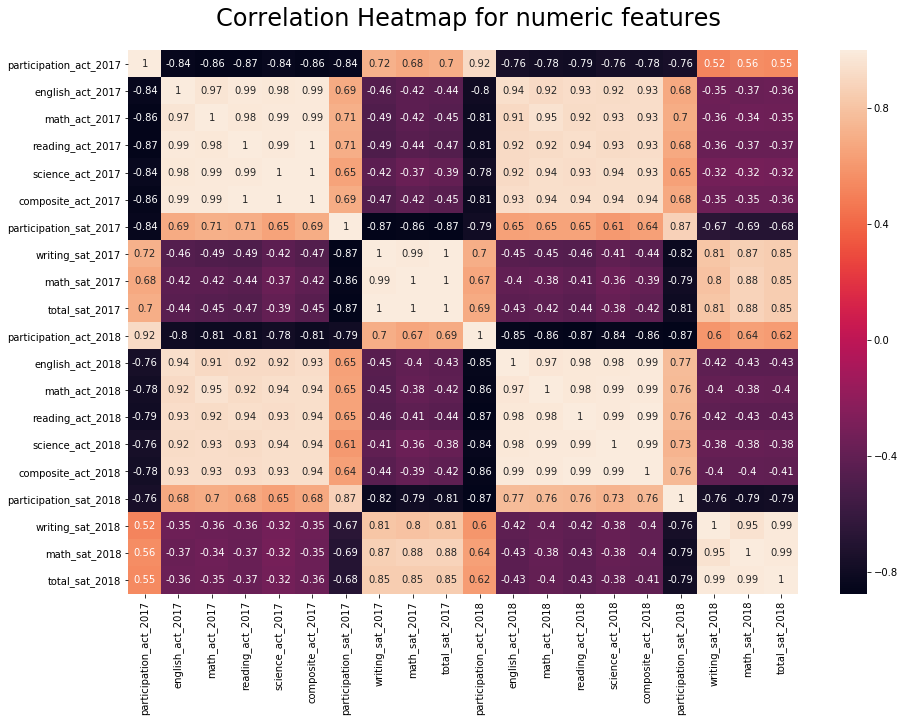

In [46]:
fig=plt.figure(figsize=(15,10),edgecolor='white',clear=True)
fig.add_axes()
ax = fig.add_subplot() # row-col-num
ax=sns.heatmap(final.corr(),annot=True)
fig.suptitle('Correlation Heatmap for numeric features',x=0.44,y=0.94, fontsize=24)



Very interesting data from this. 

The data can basically be split into two: participation and scores
with the sub classification of year, and test type.

Scores of the same test within the same year are the most highly correlated, followed by scores of the same type but of different years. The test subject matter does not seem to change this much.

Supporting Hypothesis 2, the next most correlated are the participation rates of tests, with high correlations between years of the same type of test, and just as high negative correlations between tests of different types and same year. Absolute correlations of this category are between 0.87 and 0.92, meaning a extremely strong correlation.

Following closely behind and supporting Hypothesis 1 is the correlation of participation rate and test scores. There is a highly negative correlation between the participation of a particular test and the average score in the same year. There is even a slightly higher correlation between the 2018 test participation and the previous years results than that of 2018 test results and 2017 participation, indicating a possible direction of the causality.

After that most of the correlations can be accounted for by a common cause.


Hypothesis 1(SAT) is strongly supported, with one of the highest absolute correlations between the same years participation and performance, and slightly less strong across years
Hypothesis 1(ACT) is similiarly supported with the exception of 

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [47]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,bins):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(13,4*nrows)) # You'll want to specify your figsize
    fig.tight_layout()
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=bins) 
        ax[i].set_title(list_of_titles[i],fontsize=20,pad=20)
        ax[i].set_xlabel(list_of_xlabels[i])
        
        # feel free to add more settings
        # Set titles, labels, etc here for each subplot

In [48]:
part_act=[('participation_act' in x) for x in final.columns]
part_sat=[('participation_sat' in x) for x in final.columns]
part_rates=final.columns[[('participation' in x) for x in final.columns]]
math_scores=final.columns[[('math' in x) for x in final.columns]]
rv_scores=final.columns[[('reading' in x)|('writing' in x) for x in final.columns]]
act_scores=final.columns[[('act' in x)&('participation' not in x) for x in final.columns]]
sat_scores=final.columns[[('sat' in x)&('participation' not in x)&('total' not in x) for x in final.columns]]
com_score=final.columns[[('comp' in x) for x in final.columns]]
tot_score=final.columns[[('total' in x) for x in final.columns]]


#plt.figure(figsize=(10,10))
#sns.pairplot(final[final.columns[part_act]|final.columns[part_sat]])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

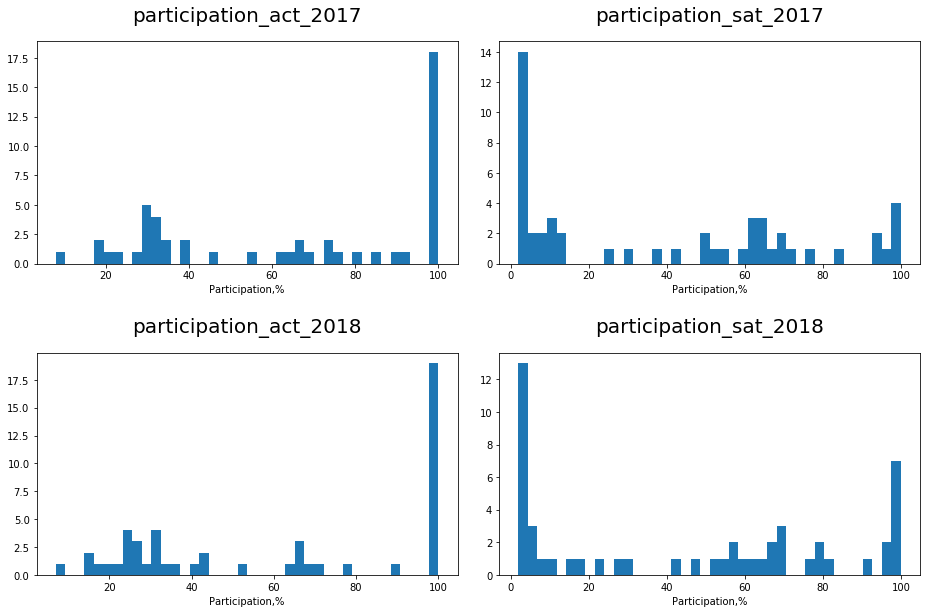

In [49]:
# Participation Rates for SAT & ACT
subplot_histograms(final,part_rates,part_rates,['Participation,%' for x in final.columns],40)

Tests in both years have similiar distributions when compared to the same test.

As observed earlier, there are significant numbers of each state having either near 100% or near 0% of the ACT and SAT respectively. Other than those states in the extremes, the participation rates look to be normally distributed around 30% and 65% for the ACT and SAT respectively.

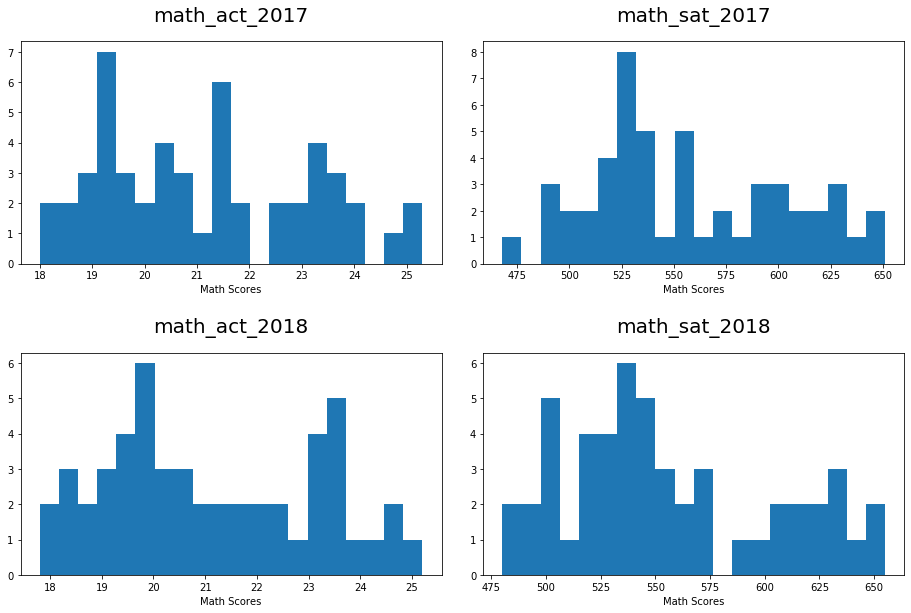

In [50]:
# Math Scores for SAT and ACT
subplot_histograms(final,math_scores,math_scores,['Math Scores' for x in final.columns],20);

The distributions change more than participation rates between years, but the general shape remains the same.

The ACT math scores seem to have two peaks aruond 23 and 20 while the SAT has two around 525 with a small peak at 625

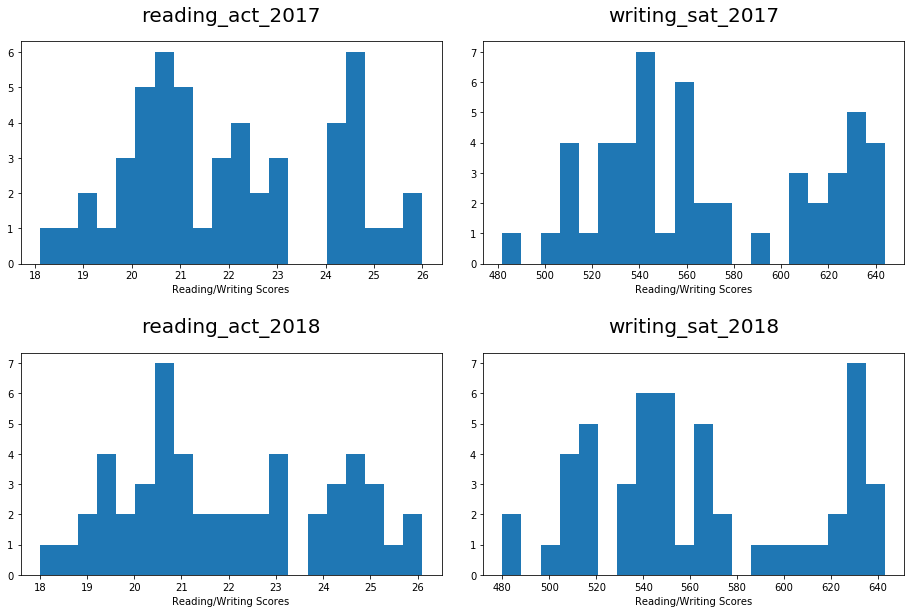

In [51]:
# Math Scores for SAT and ACT
subplot_histograms(final,rv_scores,rv_scores,['Reading/Writing Scores' for x in final.columns],20);

The two peak phenomena is even more apparent here where both test there are again two peaks. It is interesting that in all four tests, the populations are so disparate that there are test scores bins that are entirely empty, at around 580 for the SAT and 23.5 for the ACT. This indicates that there are really two very different populations present.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [52]:
def subplot_scatterplots(dataframe, list_of_col1, list_of_col2, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_col1)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(13,4*nrows)) # You'll want to specify your figsize
    fig.tight_layout()
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    
    for i, column in enumerate(list_of_col1): # Gives us an index value to get into all our lists
        legend=final.corr()[column][(list_of_col2[i])]
        
        sns.scatterplot(dataframe[column],dataframe[list_of_col2[i]],ax=ax[i])
        sns.regplot(dataframe[column],dataframe[list_of_col2[i]],ax=ax[i],label='Regression Line') 
        ax[i].set_title('{} vs {}'.format(column,list_of_col2[i]),fontsize=14,pad=20)
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        ax[i].legend(['Correlation= '+str(legend)],fontsize='medium',loc='best')
        
        # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        
        plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


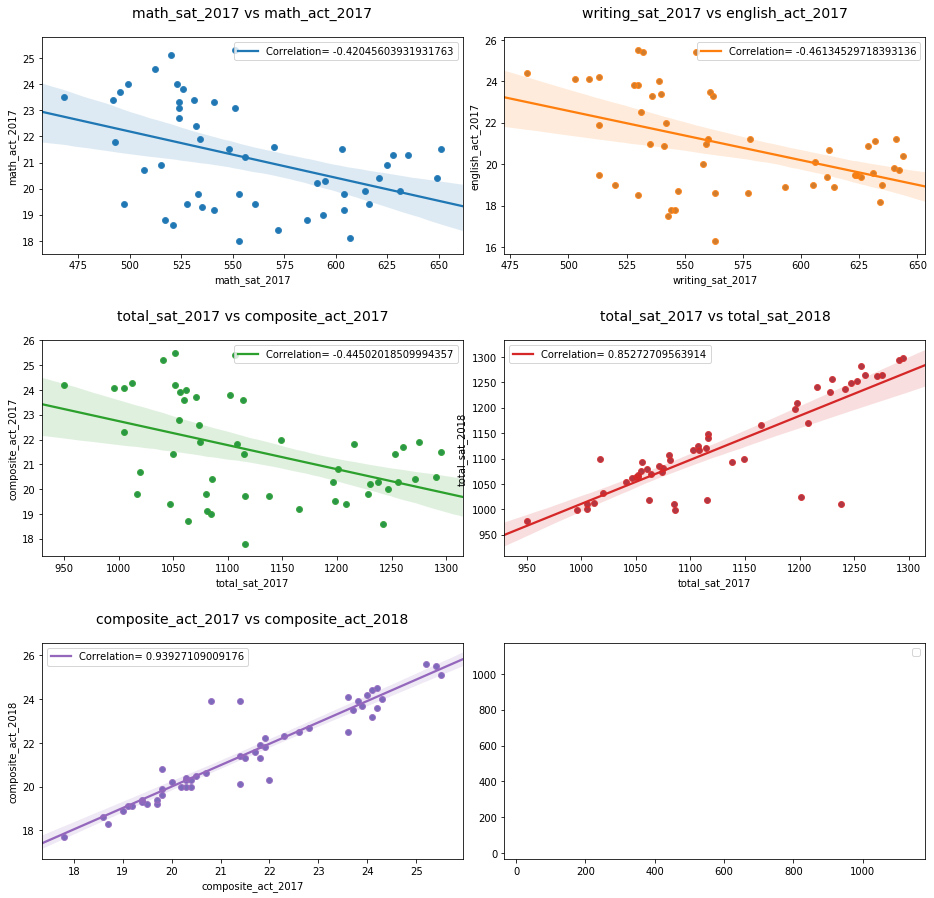

In [53]:
# Code
col1s=['math_sat_2017','writing_sat_2017','total_sat_2017','total_sat_2017','composite_act_2017']
col2s=['math_act_2017','english_act_2017','composite_act_2017','total_sat_2018','composite_act_2018']

subplot_scatterplots(final,col1s,col2s,col1s,col2s)

Test score scatterplots, SAT vs ACT:

The test scores for the ACT and SAT, even in the same subject, appear to be slightly negatively correlated, but with a very weak correlation, as we saw in the correlation heatmap earlier. The scatter plots reinforce this impression. It is interesting that all three sets of data have a similiar shape. In conjunction with the observation of "two separate populations" it is possible that we may find a categorical rule that would split this into two populations with higher correlations?

Test scores scatter plots 2017 vs 2018:

The test scores within the same test but across different years show a very strong linear correlation, as was seen in the heatmap.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [54]:
def subplot_boxplots(dataframe, list_of_col1,title):

    nrows= int(np.ceil(len(list_of_col1)/4))
    ncols = 4 # Makes sure you have enough cols
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols,figsize=(3*ncols,3*nrows),sharey=True) # You'll want to specify your figsize
    fig.tight_layout()
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.subplots_adjust(left=None, bottom=None, right=1, top=None, wspace=None, hspace=0.4)
    fig.suptitle(title,fontsize=30,y=1.2,x=.5)
    for i, column in enumerate(list_of_col1): # Gives us an index value to get into all our lists
        sns.boxplot(dataframe[column],ax=ax[i],orient='v') 
        ax[i].set_xlabel(list_of_col1[i])

        
        # feel free to add more settings
        # Set titles, labels, etc here for each subplot

In [55]:
act_scores

Index(['english_act_2017', 'math_act_2017', 'reading_act_2017',
       'science_act_2017', 'composite_act_2017', 'english_act_2018',
       'math_act_2018', 'reading_act_2018', 'science_act_2018',
       'composite_act_2018'],
      dtype='object')

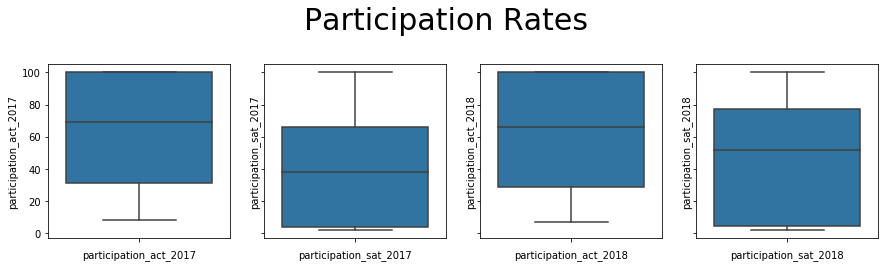

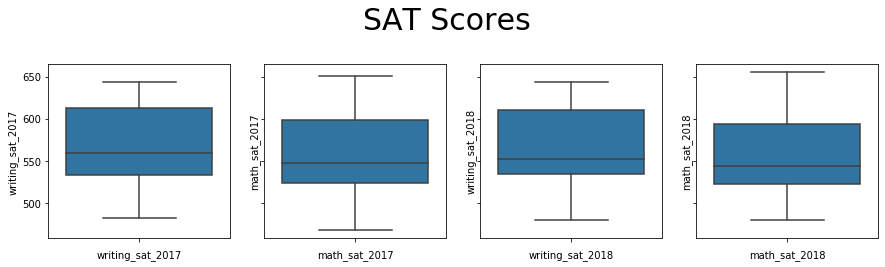

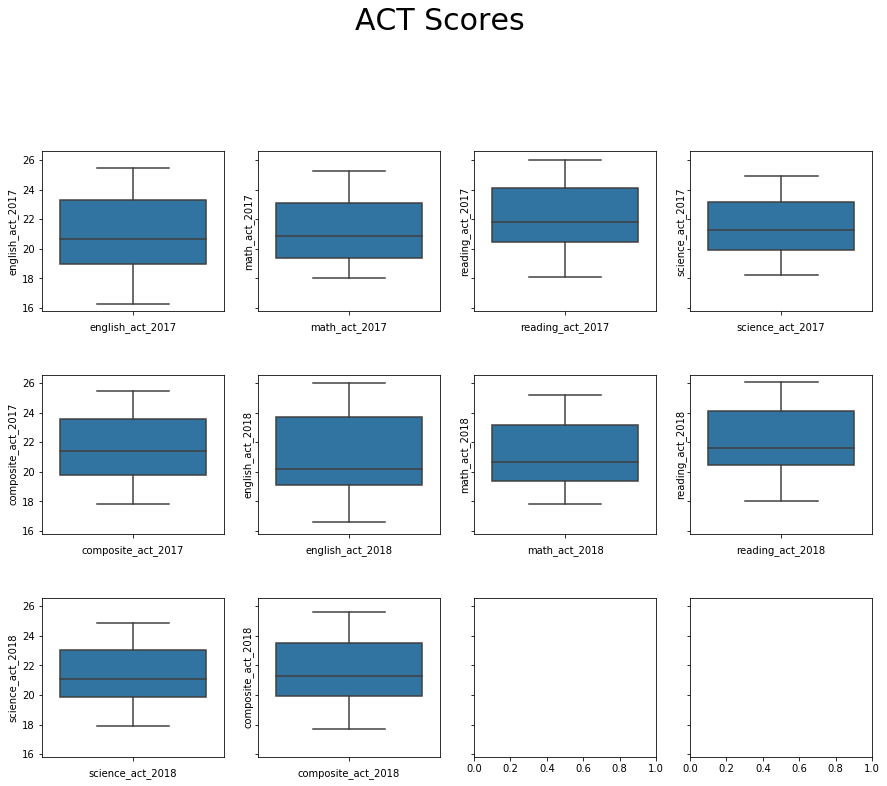

In [56]:
# Code

subplot_boxplots(final,part_rates,'Participation Rates')
subplot_boxplots(final,sat_scores,'SAT Scores')
subplot_boxplots(final,act_scores,'ACT Scores')

For participation rates, we observe the same trend as we saw in the histograms(they are basically a simplified version anyway).

For SAT scores, we see that the writing SAT scores are more narrowly distributed that the math SAT scores, with both higher peak and lower minimums, but the math SAT median is lower in both cases than the writing SAT median.

In contrast, the reading and english scores for the ACT are more widely distributed than their math and science counterparts, with english ACT having the widest distribution.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

As mentioned, the states with 100% participation rate are suspected to have mandatory testing. To find out the effect of the mandatory testing, we found the list of states for which SAT and ACT are mandatory, saved it as csv, and will now load it, and add it as dummy variables to the main dataframe

In [57]:
law_2017=pd.read_csv('../data/test_legislation_2017.csv')
law_2018=pd.read_csv('../data/test_legislation_2018.csv')

In [58]:
law_2017

,State,ReqfreeTest
0,Alabama,ACT
1,Colorado,ACT
2,Connecticut,SAT
3,Delaware,SAT
4,District of Columbia,SAT
5,Hawaii,ACT
6,Idaho,SAT or ACT
7,Illinois,ACT
8,Kentucky,ACT
9,Louisiana,ACT


In [59]:
#get the dummies for SAT,ACT or SAT/ACT
law_2017=pd.get_dummies(law_2017,columns=['ReqfreeTest'],prefix='required_test_17')


law_2017.columns=law_2017.columns.map(lambda x: x.lower().replace(' ','_'))

In [74]:
law_2017.head()

,state,required_test_17_act,required_test_17_sat,required_test_17_sat_or_act
0,Alabama,1,0,0
1,Colorado,1,0,0
2,Connecticut,0,1,0
3,Delaware,0,1,0
4,District of Columbia,0,1,0


In [61]:
law_2017['required_test_17_act']=law_2017['required_test_17_act']
law_2017['required_test_17_sat']=law_2017['required_test_17_sat']

In [62]:
#merge with main dataframe, left join ON the main dataframe
final=pd.merge(final,law_2017,on='state',how='left')

In [63]:
law_2018.head()

,ACT,SAT
0,Alabama,Colorado
1,Hawaii,Connecticut
2,Idaho,Delaware
3,Kentucky,District of Columbia
4,Louisiana,Idaho


In [64]:
#insert into main dataframe
final['required_test_18_act']=final['state'].isin(law_2018['ACT']).astype(int)
final['required_test_18_sat']=final['state'].isin(law_2018['SAT']).astype(int)
final['required_test_18_act_or_sat']=final['required_test_18_act']*final['required_test_18_sat']
final['required_test_18_act']=final['required_test_18_act']-final['required_test_18_act_or_sat']
final['required_test_18_sat']=final['required_test_18_sat']-final['required_test_18_act_or_sat']

In [65]:
#fill in the NaN values 
final=final.fillna(0)

In [66]:
final['required_test_17_sat'].sum()

6.0

In [67]:
def subplot_hist2(df, column, filt,ranger):
    filter3=df[(df[filt[0]]==1)]
    filter4=df[(df[filt[1]]==1)]
    filter5=df[(df[filt[0]]==0)&(df[filt[1]]==0)]
    filters=[filter5,filter4,filter3]
    filter_titles=['No restrictions','ACT free/mandatory','SAT free/mandatory']
    hist_list=[]
    fig,ax=plt.subplots(figsize=(15,8),nrows=2,ncols=2,sharey=True,sharex=False)
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    colorlist=['grey','darkorange','darkred']
    ax=ax.ravel()
   
    for index, item in enumerate(filters):
        ax[index].hist(item[column],stacked=True,bins=40,range=ranger,color=colorlist[index])
        #ax[index].hist(item[column],bins=20,range=ranger)
        ax[index].set_title(filter_titles[index])
        hist_list.append(item[column])

        

    
    ax[3].hist(hist_list,stacked=True,bins=40,range=ranger,color=colorlist)
    fig.legend(filter_titles,fontsize='x-large',loc='upper right')
    fig.suptitle(column.replace('_',' ').upper(),fontsize=30,y=1.02)

In [68]:
def stacked_hist2(df, column, filt,ranger):
    filter3=df[(df[filt[0]]==1)]
    filter4=df[(df[filt[1]]==1)]
    filter5=df[(df[filt[0]]==0)&(df[filt[1]]==0)]
    filters=[filter5,filter4,filter3]
    filter_titles=['No restrictions','ACT free/mandatory','SAT free/mandatory']
    hist_list=[]
    
    fig,ax=plt.subplots(figsize=(15,8),sharey=True,sharex=True)
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    #ax=ax.ravel()
   
    for index, item in enumerate(filters):
        hist_list.append(item[column])

    
    ax.hist(hist_list,stacked=True,bins=20,range=ranger)
    fig.legend(filter_titles,fontsize='x-large')
    fig.suptitle(column.replace('_',' ').upper(),fontsize=30)

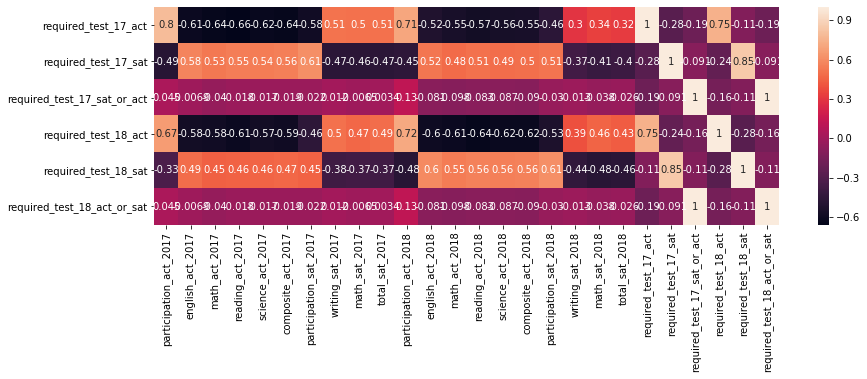

In [69]:
plt.figure(figsize=(14,4))

sns.heatmap(final.corr()[-6:],annot=True)

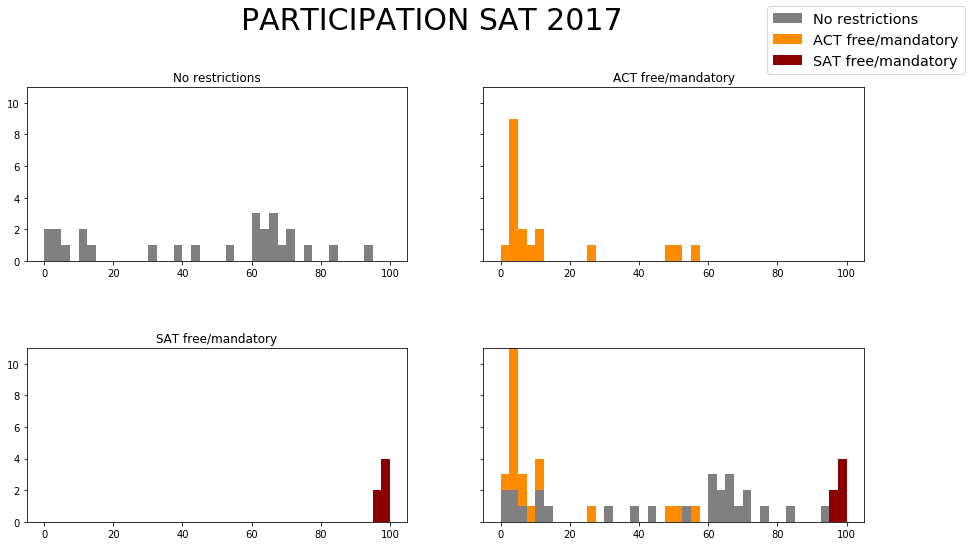

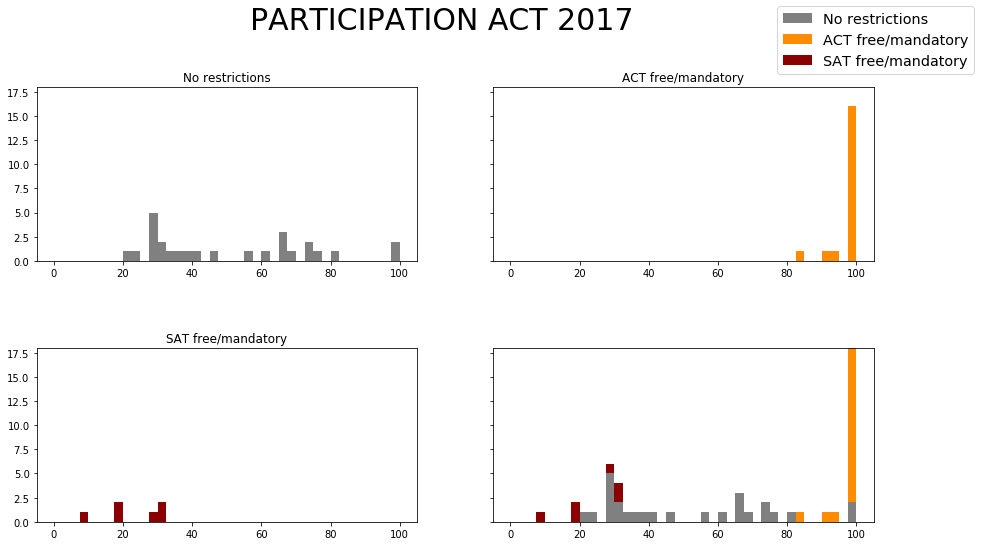

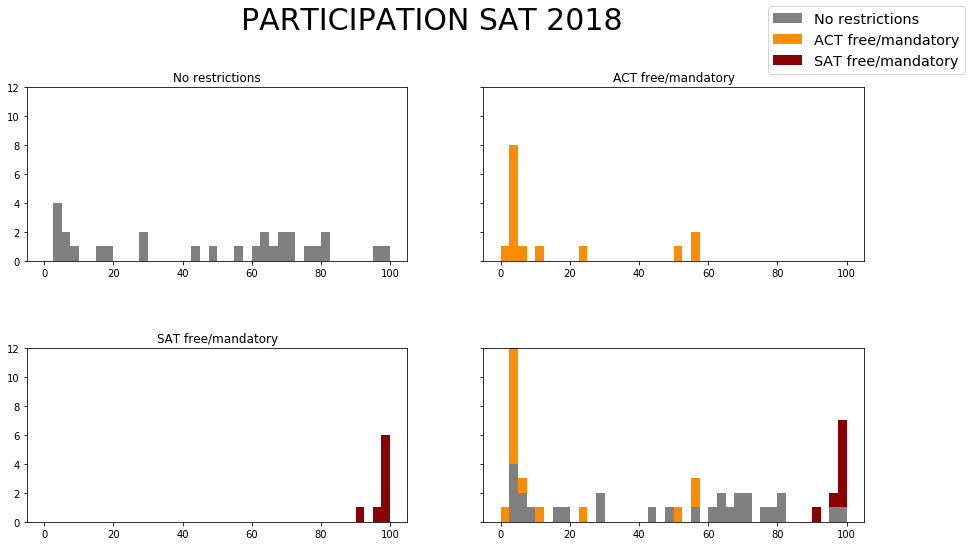

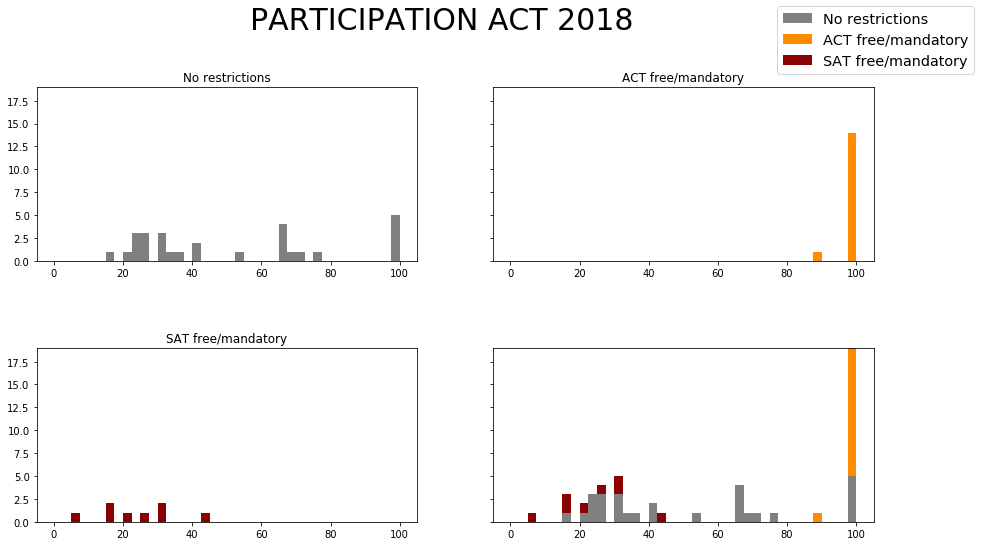

In [70]:
subplot_hist2(final,'participation_sat_2017',['required_test_17_sat','required_test_17_act'],[0,100])
subplot_hist2(final,'participation_act_2017',['required_test_17_sat','required_test_17_act'],[0,100])
subplot_hist2(final,'participation_sat_2018',['required_test_18_sat','required_test_18_act'],[0,100])
subplot_hist2(final,'participation_act_2018',['required_test_18_sat','required_test_18_act'],[0,100])
final['total_participation_2018']=final['participation_sat_2018']+final['participation_act_2018']

Having observed the distributions earlier, we saw distributions that appeared to have multiple peaks rather than being centred around one median point. Also, we saw that many states had participation rates at 100% for one of the tests. This prompted a study into whether or not these states had some sort legislation that caused this.

From searching online, we discovered that many states indeed had made testing free for students, and in addition some had also made it mandatory. I was curious to see if that explained the 100% participation states. As I discovered, all the 100% participation states had mandatory testing, and many of the higher percentage state states had full subsidies. This made the case for this legislation separating states into distincy populations much stronger.

Here we split the states into 3 categories, those who make SAT testing free and/or mandatory, ACT free and/or mandatory, and neither. Two forms of visualizations have been created: the correlation heatmap, and the individual and combined stacked histograms.

As expected, the relationships between the corresponindg test requirement and test participation rates are strong, with high correlations seen in the heatmap and subsequently the test performances. As we observe the histograms, we also see that the chosen categories do seem to be in distinct groups across all 4 tests across the 2 years. 

There are some outliers, but when investigated, the states involved had just transitioned into mandatory testing and so allowed some school districts to use alternative testing.



#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [72]:
final.describe()

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,writing_sat_2017,math_sat_2017,total_sat_2017,...,participation_sat_2018,writing_sat_2018,math_sat_2018,total_sat_2018,required_test_17_act,required_test_17_sat,required_test_17_sat_or_act,required_test_18_act,required_test_18_sat,required_test_18_act_or_sat
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,...,45.745098,563.686275,556.235294,1120.019608,0.372549,0.117647,0.058824,0.294118,0.156863,0.058824
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,...,37.314256,47.502627,47.772623,94.155083,0.488294,0.325396,0.237635,0.460179,0.367290,0.237635
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,...,2.000000,480.000000,480.000000,977.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,...,4.500000,534.500000,522.500000,1057.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,...,52.000000,552.000000,544.000000,1098.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,...,77.500000,610.500000,593.500000,1204.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,...,100.000000,643.000000,655.000000,1298.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Answers: Described indepth above with the accompanying graphs.

Participation rates for the ACT and SAT: is actually 3 distributions: a widely-distributed one for non-aligned states, then two low variance ones at either end of the scale, aligned with the accompaying legislation
ACT scores: Close to centrally distributed
SAT scores: Close to centrally distributed


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: Not definite for all. As we do not know the populatios of each state, it is impossible to tell what the sample distribution really looks like. Still, if we assume the student populations are similiar in size, it is possible to observe a possible split the three previously suggested populations, appearing to suggest a multimodal distribution for all. This is far more apparent in the participation rates than in the math and reading scores, but once split, it becomes more probable.



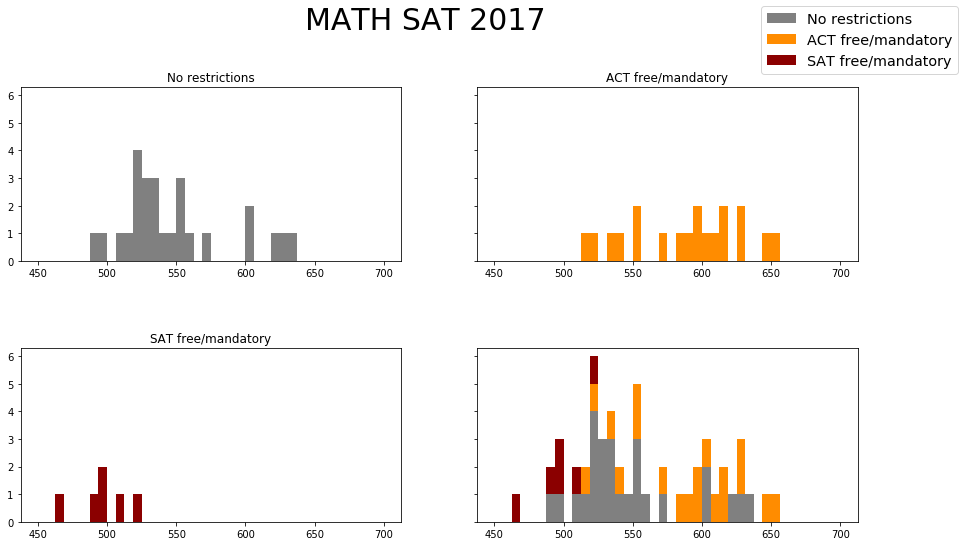

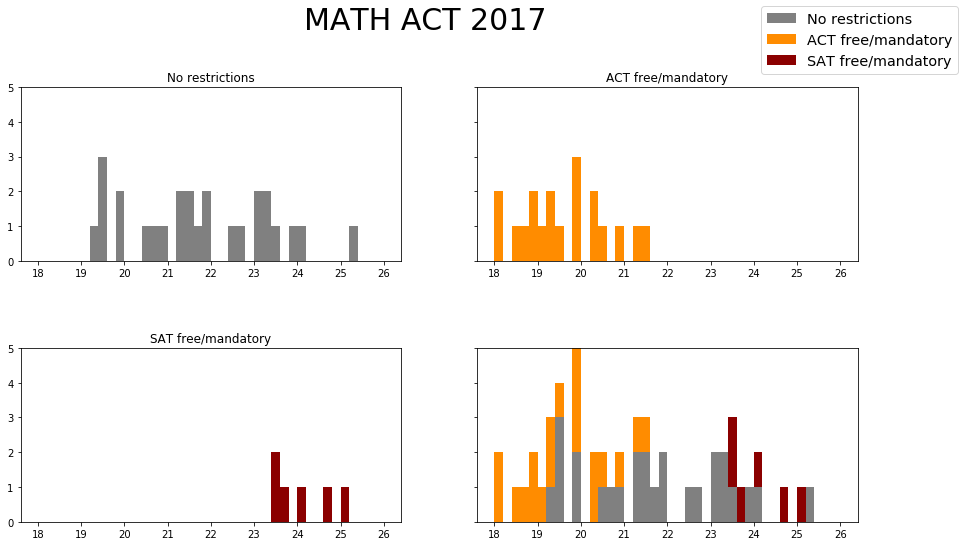

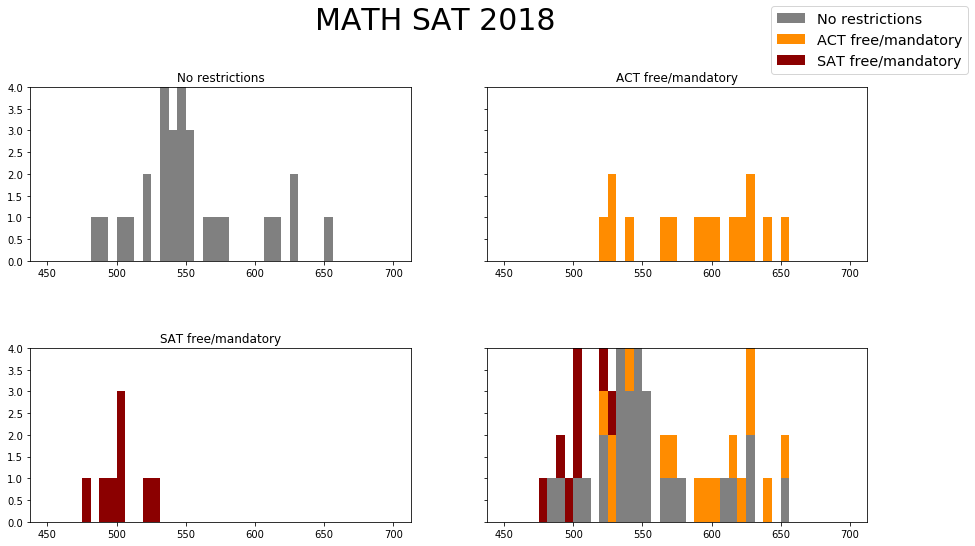

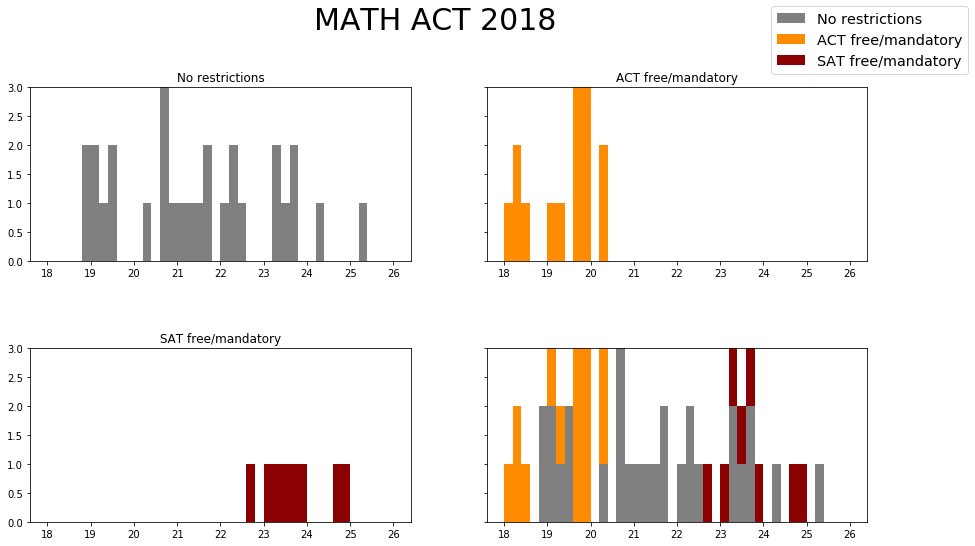

In [75]:
subplot_hist2(final,'math_sat_2017',['required_test_17_sat','required_test_17_act'],[450,700])
subplot_hist2(final,'math_act_2017',['required_test_17_sat','required_test_17_act'],[18,26])
subplot_hist2(final,'math_sat_2018',['required_test_18_sat','required_test_18_act'],[450,700])
subplot_hist2(final,'math_act_2018',['required_test_18_sat','required_test_18_act'],[18,26])

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: 
No it does not, as we do not have the data on the student populations. Each states population varies widely, and in the histogram, each unit represents what could be wildly differing numbers. Each state is also not a random sample of the population, and so cannot be taken to be used for statistical inference.



##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: Yes, as long as they are compared in ways that account for the difference in population sizes, as well as the differences in the test metrics.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Colorado, Florida and Iowa

Colorado has the highest change in participation rate.
South Carolina has the highest total participation rate.
Iowa has the lowest total participation rate.




In [89]:
colorado={'Prate':[100,30,11,100],'Test':['ACT','ACT','SAT','SAT'],'Year':[2017,2018,2017,2018]}

In [90]:
df=pd.DataFrame(colorado)

In [91]:
df

,Prate,Test,Year
0,100,ACT,2017
1,30,ACT,2018
2,11,SAT,2017
3,100,SAT,2018


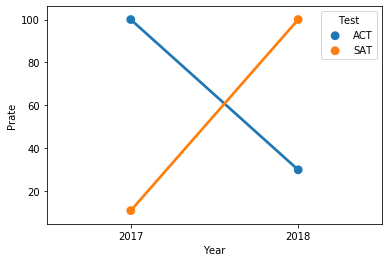

In [92]:
sns.pointplot(x='Year',y='Prate',data=df,hue='Test')

Upon further research, we find that the Colorado Education board switched tests in 2017, from the ACT to the SAT. Participation rates dropped from 100 to 30% for ACT while SAT participation went from 11 to 100%.

[(18, 21.5)]

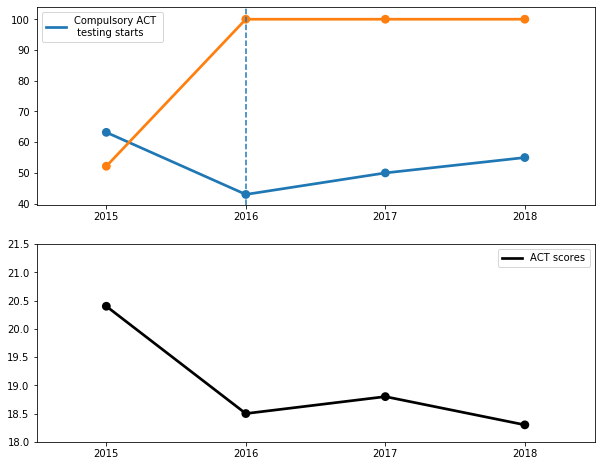

In [206]:
SC={'Prate':[63.2,43,50,55,2225200/42650,100,100,100],'Test':['SAT','SAT','SAT','SAT','ACT','ACT','ACT','ACT'],'Year':[2015,2016,2017,2018,2015,2016,2017,2018]}
df=pd.DataFrame(SC)
fig,ax1=plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.pointplot(x='Year',y='Prate',data=SC,hue='Test',ax=ax1[0])
ax1[0].axvline(x=1,linestyle='--')
ax1[0].legend(['Compulsory ACT \n testing starts'])
22252/42650

act_scores=[20.4,18.5,18.8,18.3]
act_year=[2015,2016,2017,2018]


sns.pointplot(act_year, [x for x in act_scores],color="black",ax=ax1[1])
ax1[1].legend(['ACT scores'])
ax1[1].set(ylim=(18, 21.5))





(18, 21.5)

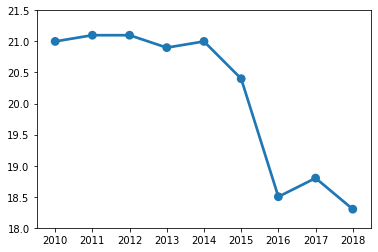

In [209]:
act_scores=[21.0,21.1,21.1,20.9,21.0,20.4,18.5,18.8,18.3]
act_year=[2010,2011,2012,2013,2014,2015,2016,2017,2018]

sns.pointplot(act_year, act_scores)
plt.ylim(18, 21.5)


South Carolina has the highest participation rates in both tests. It made the ACT mandatory in 2015, until 2017, but consistently performed poorly, averaging 18.7,18.5 and 18.3, which was second-last in 2017. Many news articles were found about this trend, and could explain the increasing SAT participation rate as a result of loss in faith in the school preparation for the ACT. Indeed, we see that SAT participation rates for south carolina has increased since mandatory testing for the ACT started.

14-15 63.2% 2015-16 was43%

Iowa has the lowest total participation rate, and the reason is soon apparent: they are among a number of states which have their own high school leaving exam, in this case, the Iowa Statewide Assessment of Student Progress (ISASP). In addition, news about the education program seems to be largely positive, and trust in the program may be what keeps the SAT and ACT participation rate low.

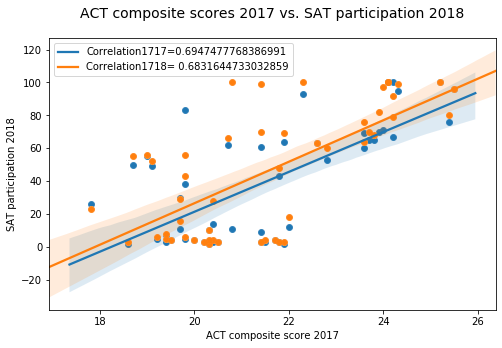

In [239]:
corr=[final.corr()['composite_act_2017']['participation_sat_2017'],final.corr()['composite_act_2017']['participation_sat_2018']]
fig,ax=plt.subplots(ncols=1,figsize=(8,5))
sns.scatterplot(final['composite_act_2017'],final['participation_sat_2017'],ax=ax)
sns.regplot(final['composite_act_2017'],final['participation_sat_2017'],ax=ax,label='Regression Line') 
ax.set_title('ACT composite scores 2017 vs. SAT participation 2017',fontsize=14,pad=20)
ax.set_xlabel('ACT composite score 2017')
ax.set_ylabel('SAT participation 2017')
ax.legend([],fontsize='medium',loc='best')

sns.scatterplot(final['composite_act_2017'],final['participation_sat_2018'],ax=ax)
sns.regplot(final['composite_act_2017'],final['participation_sat_2018'],ax=ax,label='Regression Line') 
ax.set_title('ACT composite scores 2017 vs. SAT participation 2018',fontsize=14,pad=20)
ax.set_xlabel('ACT composite score 2017')
ax.set_ylabel('SAT participation 2018')
ax.legend(['Correlation1717='+str(corr[0]),'Correlation1718= '+str(corr[1])],fontsize='medium',loc='best')
        

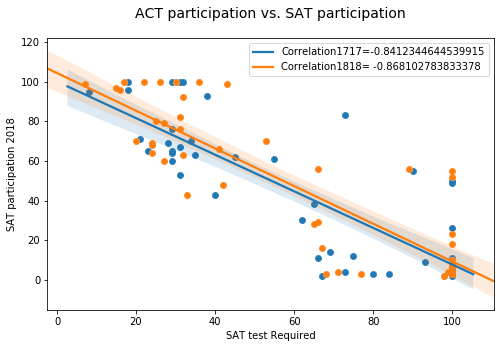

In [243]:
corr=[final.corr()['participation_act_2017']['participation_sat_2017'],final.corr()['participation_act_2018']['participation_sat_2018']]
fig,ax=plt.subplots(ncols=1,figsize=(8,5))
sns.scatterplot(final['participation_act_2017'],final['participation_sat_2017'],ax=ax)
sns.regplot(final['participation_act_2017'],final['participation_sat_2017'],ax=ax,label='Regression Line') 
ax.set_title('ACT composite scores 2017 vs. SAT participation 2017',fontsize=14,pad=20)
ax.set_xlabel('SAT test required')
ax.set_ylabel('SAT participation 2017')
ax.legend([],fontsize='medium',loc='best')

sns.scatterplot(final['participation_act_2018'],final['participation_sat_2018'],ax=ax)
sns.regplot(final['participation_act_2018'],final['participation_sat_2018'],ax=ax,label='Regression Line') 
ax.set_title('ACT participation vs. SAT participation',fontsize=14,pad=20)
ax.set_xlabel('SAT test Required')
ax.set_ylabel('SAT participation 2018')
ax.legend(['Correlation1717='+str(corr[0]),'Correlation1818= '+str(corr[1])],fontsize='medium',loc='best')
        

## Conclusions and Recommendations

Conclusions:
    
The single most effective way to increase participation rates is to make it compulsory, though it comes at a cost to scoring in the test. Another effective way is to make the test free. Many states have done this and observation of the histograms distinctly shows them apart from the unregulated population. 

Drawing from observations in the paper, the author proposes that the participation rate of students is not a single normal distribution, but a multimodal one that consists of three distinct populations, having ACT, SAT and no regulatory testing respectively. 

In this paper the author was not able to do the statistical inference without finding further data on the standard deviations of the population, and highly recommends future studies to continue in this study. 

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In Florida, which has the highest total particpation rate, showing there is already lack of trust in the education system there. By putting themselves forward as an recognised industry expert in standardized testing, CollegeBoard can secure a foothold while also pushing its competitor, ACT out. 